<h4><b>Regressão linear simples</b></h4>
<p>Experimento com amostra de dados pequena visando obter análises iniciais.</p>
<ul>
    <li>Feature previsora: distance</li>    
    <li>Feature target: duration</li>
</ul>

In [26]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from yellowbrick.regressor import ResidualsPlot
import pickle

<h4><b>Carregando amostras</b></h4>

In [2]:
path='/media/marcos/500GB/00_datasets/small/small_travel_duration_df.csv'
df = pd.read_csv(path)

In [3]:
df

,distance,duration
0,5100.0,900.0
1,17300.0,1620.0
2,11300.0,1680.0
3,1100.0,240.0
4,2000.0,480.0
5,14700.0,1320.0
6,28700.0,2280.0
7,15300.0,1980.0
8,11000.0,1440.0
9,30500.0,2220.0


<h4><b>Criando variável X que irá armazenar a feature previsora e y armazenando duration, que seria o objetivo</b></h4>

In [4]:
X = df.iloc[:,0].values
X

array([ 5100., 17300., 11300.,  1100.,  2000., 14700., 28700., 15300.,
       11000., 30500.])

In [5]:
y = df.iloc[:,1].values
y

array([ 900., 1620., 1680.,  240.,  480., 1320., 2280., 1980., 1440.,
       2220.])

<h4><b>Calculando coeficiente de correlação</b></h4>
<p>Gerando a matriz, podemos observar que a correlação entre as duas features é de 0.91, este valor pode indicar que 91% das durações das viagens podem ser explicadas através da distância entre os itinerários, ou seja uma correlação forte.</p>

In [6]:
np.corrcoef(X, y)

array([[1.       , 0.9151836],
       [0.9151836, 1.       ]])

<h4><b>Transformando a variável X_travel_duration em matriz ou adicionando mais uma dimensão</b></h4>

In [7]:
X.shape

(10,)

In [8]:
X = X.reshape(-1, 1)
X

array([[ 5100.],
       [17300.],
       [11300.],
       [ 1100.],
       [ 2000.],
       [14700.],
       [28700.],
       [15300.],
       [11000.],
       [30500.]])

In [9]:
X.shape

(10, 1)

<h4><b>Treinamento</b></h4>
<p>O treinamento tem objetivo de encontrar o parâmetro b0 e os coeficientes para cada uma das features.</p>
<p>b0 e o coeficiente definem a localização da linha.</p>

In [10]:
regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression()

b0 = 546.68, indica o início da linha da regressão

In [11]:
regressor.intercept_

546.6798173032369

b1 = 0.06, indica o declive da linha

In [12]:
regressor.coef_

array([0.06345403])

<h4><b>Realizando previsões</b></h4>
<p>Realizando previsões visando uma primeira análise</p>
<p>As previsões são geradas por meio da aplicação desta fórmula:</p>

<span style="font-size: 150%;"> $ y = b_{0} + b_{1} \cdot x_{1} $ </span>
\begin{flalign*}
& y = \text{Previsão da duração} & \\
& b_{0} = \text{Constante} & \\
& b_{1} = \text{Coeficiente} & \\
& x_{1} = \text{Distância} &
\end{flalign*}

In [13]:
predictors = regressor.predict(X)
predictors

array([ 870.29535977, 1644.43450056, 1263.71033296,  616.47924803,
        673.58787317, 1479.45402793, 2367.81041901, 1517.52644469,
       1244.67412458, 2482.02766929])

<h4><b>Plotando gráfico</b></h4>
<p>Plotando gráfico onde os valores de X são as distâncias das viagens e y a duração</p>
<p>As predições estão adicionadas em vermelho.</p>

<h4><b>Algumas análises</b></h4>
<ul>
    <li>Observando o terceiro item do array de previsões, o valor predito foi 616.4792 enquanto o valor real é 240;</li>
    <li>A previsão mais próxima foi 1644.435 enquanto valor real é 1620;</li>
    <li>As predições tomam forma de reta porque estamos aplicando a equação da reta.</li>
</ul>

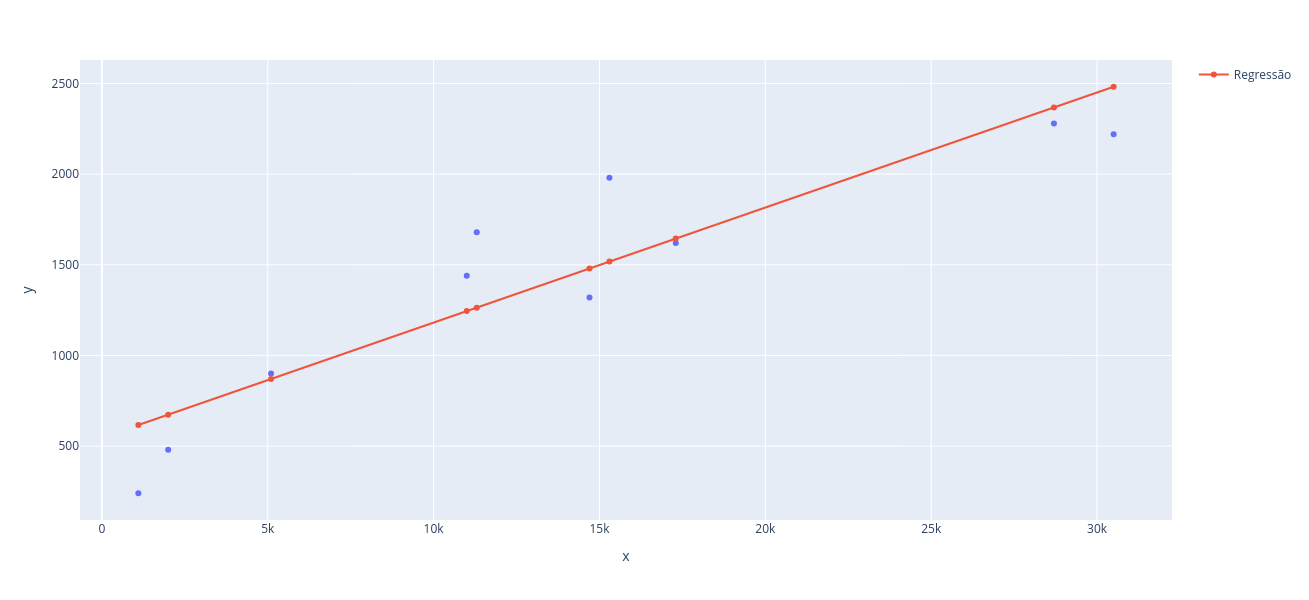

In [15]:
graphic = px.scatter(x=X.ravel(), y=y, width=800, height=600)
graphic.add_scatter(x=X.ravel(), y=predictors, name='Regressão')
graphic.show()

<h4><b>Exemplos de previsão</b></h4>

In [18]:
regressor.intercept_ + regressor.coef_ * 5100

array([870.29535977])

In [20]:
regressor.predict([[5100]])

array([870.29535977])

<h4><b>Verificando Score</b></h4>
<p>Score indica a qualidade do algoritmo, quanto mais próximo de 1.0 melhor é este valor.</p>
<p>O score é de 0.83, pode-se considerar um bom valor.</p>

In [21]:
regressor.score(X, y)

0.8375610153337711

<h4><b>Plotando os residuais</b></h4>
<p>Gerando o gráfico dos residuais</p>
<ul>
    <li>Distância dos valores originais para a linha da regressão linear;</li>
    <li>Exibe também o quão os dados estão afastados da linha de regressão;</li>
    <li>O Train R² = 0.838 que indica a qualidade do algoritmo;</li>
</ul>

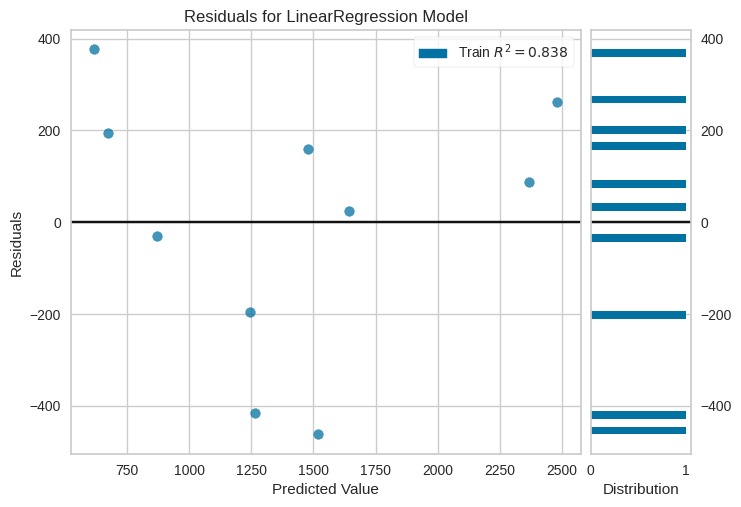

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [22]:
visualizer = ResidualsPlot(regressor)
visualizer.fit(X, y)
visualizer.poof()

<h4><b>Calculando Mean Absolute Error</b></h4>

In [23]:
predictors

array([ 870.29535977, 1644.43450056, 1263.71033296,  616.47924803,
        673.58787317, 1479.45402793, 2367.81041901, 1517.52644469,
       1244.67412458, 2482.02766929])

In [24]:
y

array([ 900., 1620., 1680.,  240.,  480., 1320., 2280., 1980., 1440.,
       2220.])

In [25]:
abs(y - predictors).mean()

220.75874760045008

In [27]:
mean_absolute_error(y, predictors)

220.75874760045008

<h4><b>Calculando Mean Squared Error (MSE)</b></h4>

In [28]:
mean_squared_error(y, predictors)

70781.81293440124

<h4><b>Calculando Root Mean Squared Error (RMSE)</b></h4>

In [29]:
np.sqrt(mean_squared_error(y, predictors))

266.04851612892196